# Compressor

In [1]:
from LaviRot import *
import scipy as sp
import numpy as np

import scipy.linalg as la
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact

np.set_printoptions(precision=3, linewidth=300)
%matplotlib inline

For this example we will consider a compressor with shaft and impellers made from AISI 4340, which has the following properties.

In [2]:
E = 205e9
Gs = 79.5e9
rho = 7850

Shaft's inner and outer diameter will be:

In [3]:
si_d = 0
so_d = 0.28

Now we define the length for each element, starting at the first element on the left (the element that will have the thrust collar).

In [4]:
L = [0.1, # thrust collar
    0.152,
    0.152, # 0 probe
    0.1075, # 0 bearing
    0.1075,
    0.2,
    0.057,
    0.0983, # 0 impeller
    0.25018, # 1 impeller
    0.25018, # 2 impeller
    0.25018, # 3 impeller
    0.25018, # 4 impeller
    0.25018, # 5 impeller
    0.25018, # honeycomb # change diameter
    0.25018,
    0.25018,
    0.1783,
    0.057, # 1 bearing
    0.1975,
    0.110, # 2 impeller
    0.110, # 3 impeller
    0.186, # 4 impeller
    0.0945, # 5 impeller
    0.04, # honeycomb # change diameter
    0.0923,
    0.0498,
    0.0802,
    0.2067, # 1 bearing
    0.121,
    0.01]

SI_D = [0, # thrust collar
    0,
    0, # 0 probe
    0, # 0 bearing
    0,
    0,
    0,
    0, # 0 impeller
    0, # 1 impeller
    0, # 2 impeller
    0, # 3 impeller
    0, # 4 impeller
    0, # 5 impeller
    0, # honeycomb # change diameter
    0,
    0,
    0.05,
    0.05, # 1 bearing
    0.05,
    0.05, # 2 impeller
    0.05, # 3 impeller
    0.05, # 4 impeller
    0.05, # 5 impeller
    0.05, # honeycomb # change diameter
    0.05,
    0.05,
    0.05,
    0.05, # 1 bearing
    0.05,
    0.05]

SO_D = [0.56, # thrust collar
    0.28,
    0.28, # 0 probe
    0.28, # 0 bearing
    0.28,
    0.28,
    0.41,
    0.5159, # 0 impeller
    0.5159, # 1 impeller
    0.5159, # 2 impeller
    0.5159, # 3 impeller
    0.5159, # 4 impeller
    0.5159, # 5 impeller
    0.5159, # honeycomb # change diameter
    0.5159,
    0.5159,
    0.5159,
    0.41, # 1 bearing
    0.28,
    0.28, # 2 impeller
    0.28, # 3 impeller
    0.28, # 4 impeller
    0.225, # 5 impeller
    0.205, # honeycomb # change diameter
    0.205,
    0.192,
    0.192,
    0.1802, # 1 bearing
    0.173,
    0.166]

RHO = [7850, # thrust collar
    7850,
    7850, # 0 probe
    7850, # 0 bearing
    7850,
    7850,
    7850,
    6636.7, # 0 impeller
    6636.7, # 1 impeller
    6636.7, # 2 impeller
    6636.7, # 3 impeller
    6636.7, # 4 impeller
    6636.7, # 5 impeller
    6636.7, # honeycomb # change diameter
    6636.7,
    6636.7,
    6636.7,
    7850, # 1 bearing
    7850,
    7850, # 2 impeller
    7850, # 3 impeller
    7850, # 4 impeller
    7850, # 5 impeller
    7850, # honeycomb # change diameter
    7850,
    7850,
    7850,
    7850, # 1 bearing
    7850,
    7850]

The next line defines a list with the number of each element (from 0 to len(L)).

In [5]:
nelem = [x for x in range(len(L))]

In [6]:
shaft_elem = [ShaftElement(n, l, si_d, so_d, E, Gs, rho,
                           shear_effects=True,
                           rotary_inertia=True,
                           gyroscopic=True) for n, l in zip(nelem, L)]

Ajustando os valores dos diametros internos, diametros externos e massa especifica para cada elemento do eixo

In [7]:
contador = sp.linspace(0, 29, 30)
for i in contador:
    shaft_elem[int(i)].i_d = SI_D[int(i)]
    shaft_elem[int(i)].o_d = SO_D[int(i)]
    shaft_elem[int(i)].rho = RHO[int(i)]

In [8]:
disk0 = DiskElement(8, RHO[int(8)], 0.02, SO_D[int(8)], 0.2)     # Rotor Core
disk1 = DiskElement(9, RHO[int(9)], 0.02, SO_D[int(9)], 0.2)     # Rotor Core
disk2 = DiskElement(10, RHO[int(10)], 0.02, SO_D[int(10)], 0.2)  # Rotor Core
disk3 = DiskElement(11, RHO[int(11)], 0.02, SO_D[int(11)], 0.2)  # Rotor Core
disk4 = DiskElement(12, RHO[int(12)], 0.02, SO_D[int(12)], 0.2)  # Rotor Core
disk5 = DiskElement(13, RHO[int(13)], 0.02, SO_D[int(13)], 0.2)  # Rotor Core
disk6 = DiskElement(14, RHO[int(14)], 0.02, SO_D[int(14)], 0.2)  # Rotor Core
disk7 = DiskElement(15, RHO[int(15)], 0.02, SO_D[int(15)], 0.2)  # Rotor Core
disk8 = DiskElement(16, RHO[int(16)], 0.02, SO_D[int(16)], 0.2)  # Rotor Core
disk9 = DiskElement(24, RHO[int(24)], 0.02, SO_D[int(24)], 0.2)  # Fan
disk10 = DiskElement(26, RHO[int(26)], 0.02, SO_D[int(26)], 0.2) # Aux. Exciter
disk11 = DiskElement(28, RHO[int(28)], 0.02, SO_D[int(28)], 0.2) # Exciter
disk12 = DiskElement(29, RHO[int(29)], 0.02, SO_D[int(29)], 0.2) # Diode Wheel

Ajustando os valores das massas, momento de inercia e momento de inercia polar para cada carregamento imposto em seu respectivo elemento do eixo

In [9]:
disk0.m = 706.25
disk0.Id = 82.85
disk0.Ip = 163.86

disk1.m = 1412.5
disk1.Id = 171.23
disk1.Ip = 327.73

disk2.m = 1412.5
disk2.Id = 171.23
disk2.Ip = 327.73

disk3.m = 1412.5
disk3.Id = 171.23
disk3.Ip = 327.73

disk4.m = 1412.5
disk4.Id = 171.23
disk4.Ip = 327.73

disk5.m = 1412.5
disk5.Id = 171.23
disk5.Ip = 327.73

disk6.m = 1412.5
disk6.Id = 171.23
disk6.Ip = 327.73

disk7.m = 1412.5
disk7.Id = 171.23
disk7.Ip = 327.73

disk8.m = 706.25
disk8.Id = 82.85
disk8.Ip = 163.86

disk9.m = 76.67
disk9.Id = 2.35
disk9.Ip = 4.59

disk10.m = 82
disk10.Id = 1.39
disk10.Ip = 2.68

disk11.m = 439.48
disk11.Id = 18.52
disk11.Ip = 13.69

disk12.m = 48.97
disk12.Id = 2.12
disk12.Ip = 1.21

Para o obtenção dos coeficientes de rigidez e amortecimento dos mancais foi considerado uma média entre os dados provenientes de maximum clearence e minimum clearence de cada mancal, supondo que este seria uma aproximação para o ponto de operação. Em relação a velocidade, como a velocidade de operação do sistema é de 1800 rpm, 188.5 rad/s ou 30 Hz, foi considerado também uma média dos dados obtidos para as velocidades de 1650 rpm e 1987.5 rpm, disponíveis no relatório do gerador. 

In [10]:
kxx0 = (2.9e8 + 2.85e8 + 2.69e8 + 2.61e8)/4 
kxy0 = (-1.71e8 - 1.55e8 - 2.6e8 - 2.44e8)/4 
kyx0 = (-1.17e9 - 1.13e9 - 1.32e9 - 1.26e9)/4 
kyy0 = (3.17e9 + 2.98e9 + 4.46e9 + 4.21e9)/4 
cxx0 = (9.26e5 + 7.83e5 + 6.58e5 + 5.45e5)/4 
cxy0 = (-2.1e6 - 1.66e6 - 2.17e6 - 1.73e6)/4 
cyx0 = (-2.15e6 - 1.695e6 - 2.23e6 - 1.78e6)/4 
cyy0 = (1.39e7 + 1.11e7 + 1.57e7 + 1.25e7)/4 

kxx1 = (3.2e8 + 3.05e8 + 2.9e8 + 2.82e8)/4 
kxy1 = (-2.08e8 - 1.75e8 - 2.85e8 - 2.7e8)/4 
kyx1 = (-1.34e9 - 1.23e9 - 1.43e9 - 1.38e9)/4 
kyy1 = (3.79e9 + 3.29e9 + 4.89e9 + 4.64e9)/4 
cxx1 = (9.87e5 + 8.22e5 + 7e5 + 5.8e5)/4 
cxy1 = (-2.37e6 - 1.84e6 - 2.35e6 - 1.89e6)/4 
cyx1 = (-2.42e6 - 1.855e6 - 2.42e6 - 1.94e6)/4 
cyy1 = (1.59e7 + 1.21e7 + 1.7e7 + 1.36e7)/4 


bearing0 = BearingElement(4, kxx=kxx0, kxy=kxy0, kyx=kyx0, kyy=kyy0, cxx=cxx0, cxy=cxy0, cyx=cyx0, cyy=cyy0)
bearing1 = BearingElement(20, kxx=kxx1, kxy=kxy1, kyx=kyx1, kyy=kyy1, cxx=cxx1, cxy=cxy1, cyx=cyx1, cyy=cyy1)

In [11]:
gerador = Rotor(shaft_elem,
                   [disk0, disk1, disk2, disk3, disk4, disk5, disk6, disk7, disk8,disk9, disk10, disk11, disk12],
                   [bearing0, bearing1])

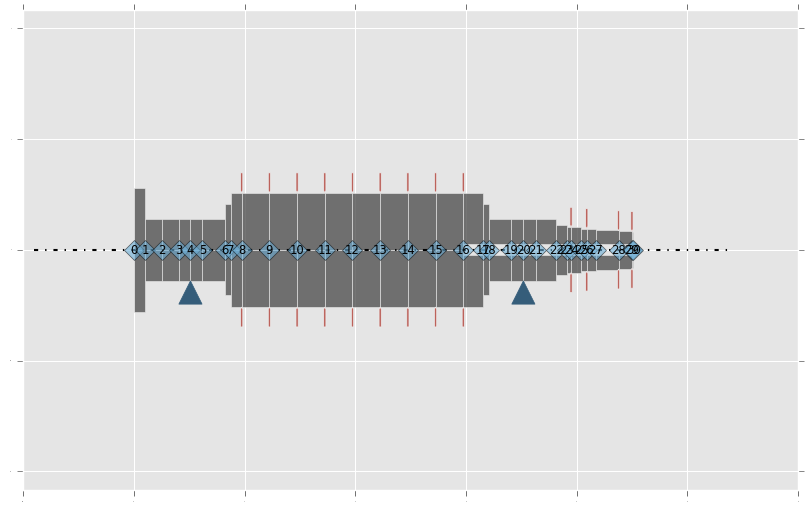

In [12]:
plot_rotor(gerador)

Now we are going to check the natural frequencies using the Campbell diagram.
First we need to define the speed range that we want to analyze.

In [13]:
speed = np.linspace(0, 500, 10)

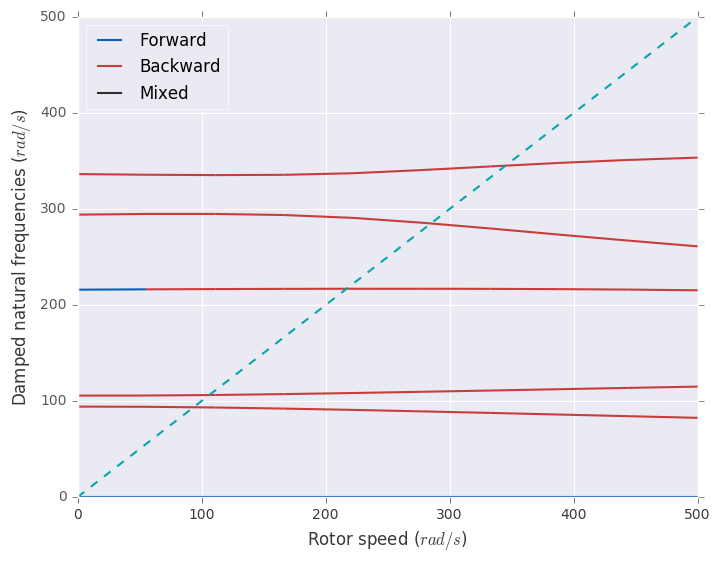

In [14]:
campbell(gerador, speed, mult=[1])

In [15]:
omega = sp.linspace(0, 300, 1000)
amp = np.zeros((len(gerador.M()),len(omega)))
c = 0
for w in omega:
    FREQ = -w**2*gerador.M() + gerador.C()*w*1j + gerador.G()*1j*w**2 + gerador.K()
    evalues, evects = la.eig(FREQ)
    wn = abs(evalues)
    elem = len(wn) - 1
    contador2 = sp.linspace(0, elem , len(wn))
    for o in contador2:
        amp[int(o),c] = wn[int(o)]
    c = c + 1

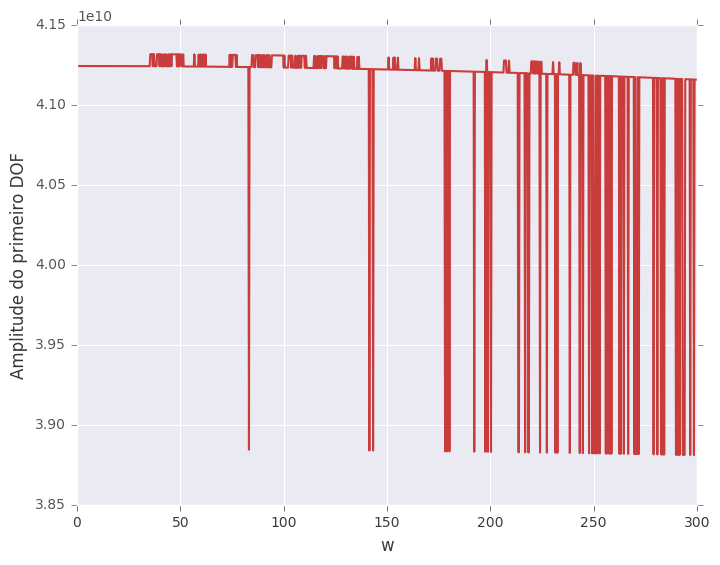

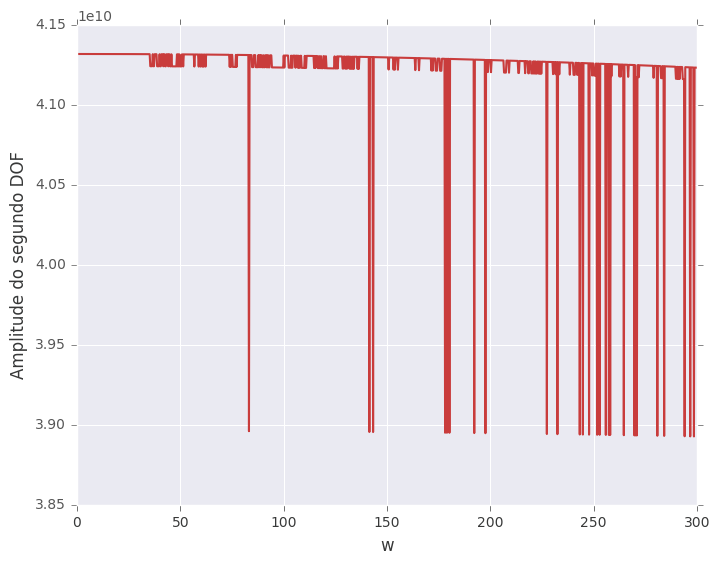

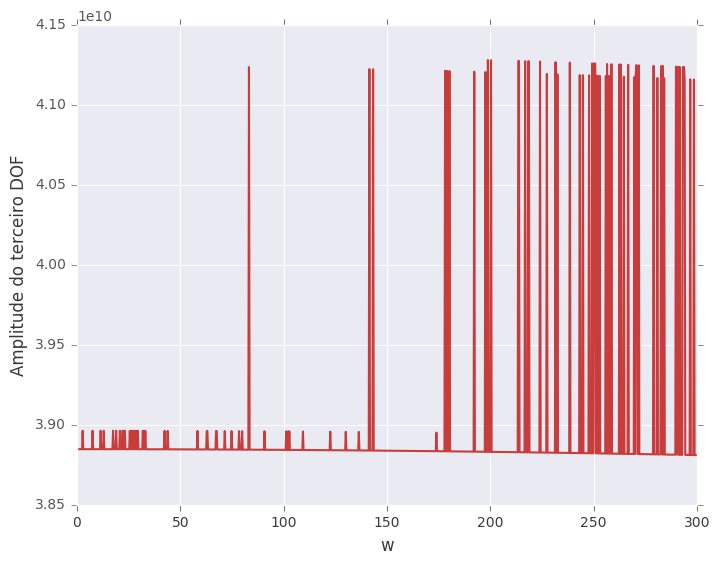

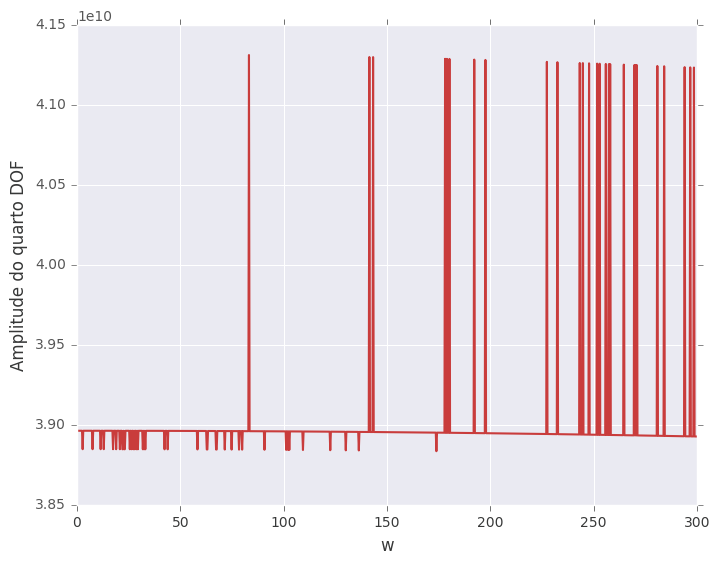

In [17]:
# Plota a Resposta em frequencia da amplitude para os 4 graus de liberdade de um nó a ser escolhido, 
# que no caso pode ser definido pela função ANo

ANo = 8

AEqNo = 4*ANo

plt.plot(omega, amp[AEqNo,:])
plt.ylabel('Amplitude do primeiro DOF')
plt.xlabel('w')
plt.show()

plt.plot(omega, amp[AEqNo+1,:])
plt.ylabel('Amplitude do segundo DOF')
plt.xlabel('w')
plt.show()

plt.plot(omega, amp[AEqNo+2,:])
plt.ylabel('Amplitude do terceiro DOF')
plt.xlabel('w')
plt.show()

plt.plot(omega, amp[AEqNo+3,:])
plt.ylabel('Amplitude do quarto DOF')
plt.xlabel('w')
plt.show()

In [18]:
def resptemp(x, t): # Função que monta o sistema para solução temporal com a velocidade de operação da máquina em rad/s
    w = 188.5
    A = gerador.A()
    f = np.zeros(len(A[:,0]))
    # Inserindo desbalaceamento nó 8, lembrando que o primeiro nó é o nó 0
    f[156] = 0.03*sp.cos(w*t)
    f[157] = 0.03*sp.sin(w*t)
    f[158] = 0.03*sp.cos(w*t)
    f[159] = 0.03*sp.sin(w*t)
    # Inserindo desbalaceamento nó 16, lembrando que o primeiro nó é o nó 0
    f[188] = 0.03*sp.cos(w*t)
    f[189] = 0.03*sp.sin(w*t)
    f[190] = 0.03*sp.cos(w*t)
    f[191] = 0.03*sp.sin(w*t)
    dxdt = A @ x + f
    
    return dxdt

In [19]:
# Condições iniciais
# Sera suposto que o sistema se inicia do repouso, com deslocamento inicial e velocidade inicial igual a zero
# Criar array com condições iniciais
A = gerador.A()
z0=np.zeros(len(A[:,0]))


# Criar array com o tempo
tf = 10
t = sp.linspace(0, tf, 100)

In [20]:
sol = odeint(resptemp, z0, t,)

C:\Users\Eduardo\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


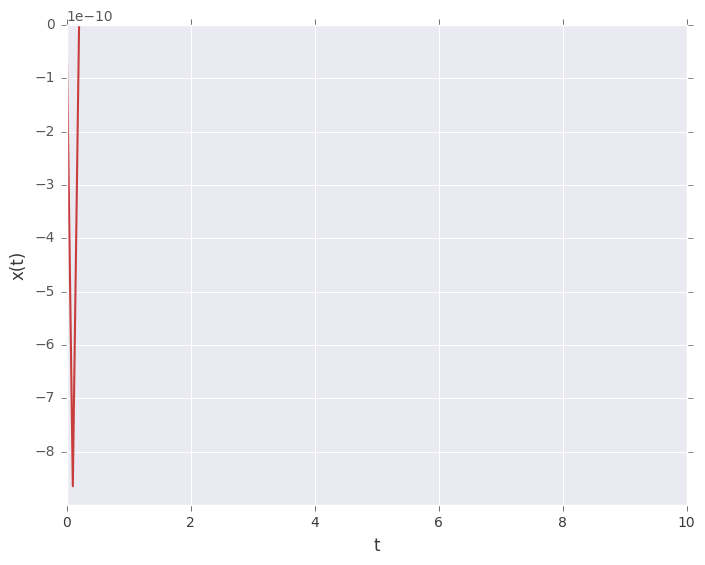

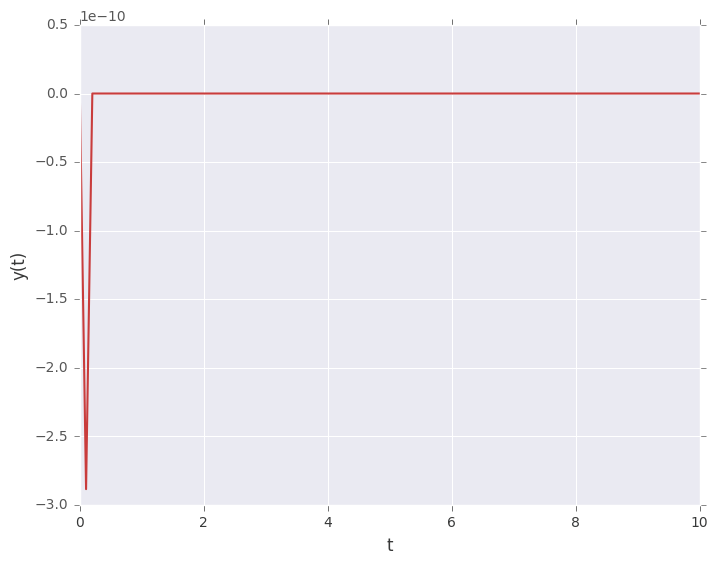

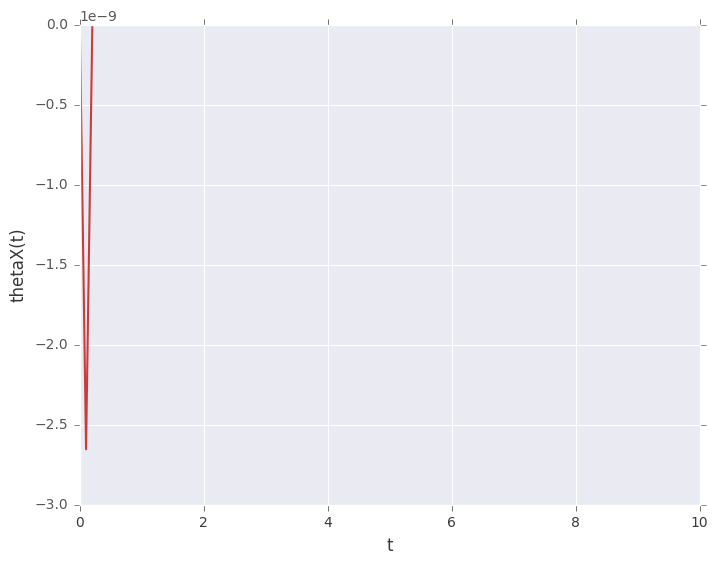

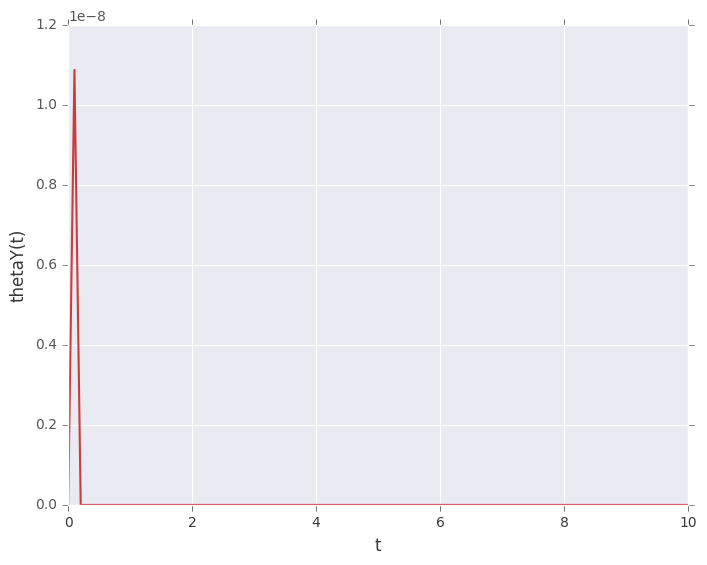

In [21]:
# Plota a resposta temporal para os 4 graus de liberdade de um nó a ser escolhido, que no caso pode ser definido pela função No

No = 1

EqNo = 4*No

plt.plot(t, sol[:,EqNo],)
plt.ylabel('x(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, sol[:,EqNo+1])
plt.ylabel('y(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, sol[:,EqNo+2])
plt.ylabel('thetaX(t)')
plt.xlabel('t')
plt.show()

plt.plot(t, sol[:,EqNo+3])
plt.ylabel('thetaY(t)')
plt.xlabel('t')
plt.show()